In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

### Missing values

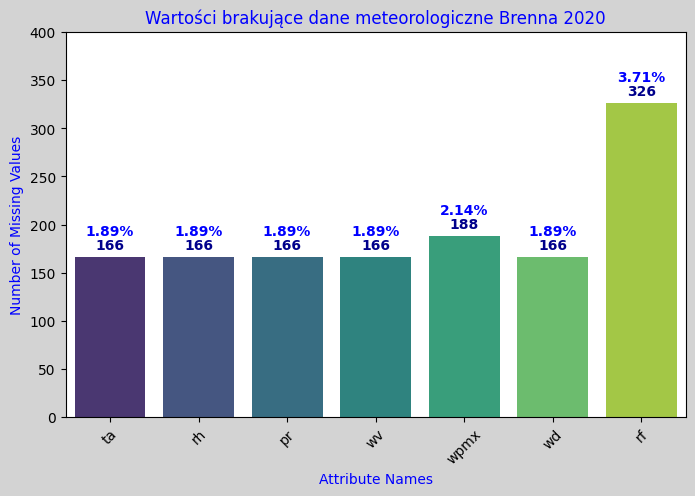

ta      166
rh      166
pr      166
wv      166
wpmx    188
wd      166
rf      326
dtype: int64


In [154]:
brenna_meteo = pd.read_csv('brenna_meteo_2020.csv', sep=';')
brenna_meteo['date'] = pd.to_datetime(brenna_meteo['date'], format='%Y-%m-%d %H:%M')
brenna_meteo.set_index('date', inplace=True)
null_counts = brenna_meteo.isnull().sum()
nullValues_percent = brenna_meteo.isnull().mean() * 100

plt.figure(figsize=(8, 5), facecolor='lightgrey')
ax = sns.barplot(
    x=null_counts.index,
    y=null_counts.values,
    palette="viridis",
    hue=null_counts.index)
ax.set_facecolor('white')
for i, v in enumerate(null_counts.values):
    ax.text(
        i,
        v + 5,
        str(v),
        ha='center',
        va='bottom',
        fontweight='bold',
        color='darkblue')
for i, v in enumerate(nullValues_percent.values):
    if v > 0:
        ax.text(i,
                null_counts.iloc[i] + 20,
                str(format(float(v),
                           ".2f")) + "%",
                ha='center',
                va='bottom',
                fontweight='bold',
                color='blue')
    else:
        continue

plt.ylim(0, 400)
plt.title("Wartości brakujące dane meteorologiczne Brenna 2020", color='blue')
plt.xlabel("Attribute Names", color='blue')
plt.ylabel("Number of Missing Values", color='blue')
plt.xticks(rotation=45)
plt.show()
print(null_counts)

In [155]:
# interpolacja liniowa brakujacych danych w przypadku tmp - wd a rf 
# Interpolacja dla zmiennych numerycznych
for col in brenna_meteo.columns:
    brenna_meteo[col] = brenna_meteo[col].astype(str)
    brenna_meteo[col] = brenna_meteo[col].str.replace(',', '.')
    brenna_meteo[col] = pd.to_numeric(brenna_meteo[col], errors='coerce')

print(brenna_meteo.dtypes)
brenna_meteo[['ta', 'rh', 'pr', 'wv', 'wpmx', 'wd']] = brenna_meteo[['ta', 'rh', 'pr', 'wv', 'wpmx', 'wd']].interpolate(method='time')
brenna_meteo['rf'] = brenna_meteo['rf'].fillna(0)


ta      float64
rh      float64
pr      float64
wv      float64
wpmx    float64
wd      float64
rf      float64
dtype: object


Liczba etykiet zmiennej ta        :   496
Liczba etykiet zmiennej rh        :   869
Liczba etykiet zmiennej pr        :   647
Liczba etykiet zmiennej wv        :   169
Liczba etykiet zmiennej wpmx      :   389
Liczba etykiet zmiennej wd        :  3022
Liczba etykiet zmiennej rf        :    58


C:\Users\barte\AppData\Local\Temp\ipykernel_9416\231372705.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


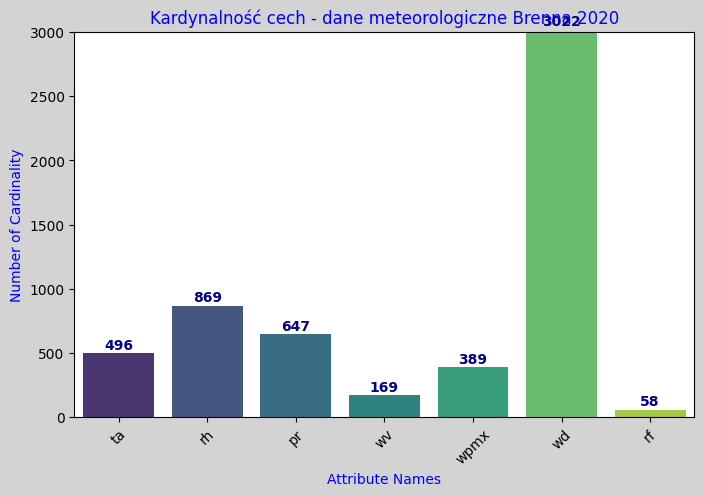

ta      166
rh      166
pr      166
wv      166
wpmx    188
wd      166
rf      326
dtype: int64
Liczba etykiet zmiennej ta        :   496
Liczba etykiet zmiennej rh        :   869
Liczba etykiet zmiennej pr        :   647
Liczba etykiet zmiennej wv        :   169
Liczba etykiet zmiennej wpmx      :   389
Liczba etykiet zmiennej wd        :   360
Liczba etykiet zmiennej rf        :     1


In [156]:
headers = brenna_meteo.columns.tolist()
cardinality = {}
for habit in headers: 
    tmp = len(brenna_meteo[habit].unique())
    cardinality[habit] = tmp
    print(f'Liczba etykiet zmiennej {habit:<10}: {tmp:>5}')

plt.figure(figsize=(8, 5), facecolor='lightgrey')
ax = sns.barplot(
    x=headers,
    y=list(cardinality.values()),
    palette="viridis"
)
ax.set_facecolor('white')
for i, v in enumerate(cardinality.values()):
    ax.text(
        i,
        v + 10,
        str(v),
        ha='center',
        va='bottom',
        fontweight='bold',
        color='darkblue')

plt.ylim(0, 3000)
plt.title("Kardynalność cech - dane meteorologiczne Brenna 2020", color='blue')
plt.xlabel("Attribute Names", color='blue')
plt.ylabel("Number of Cardinality", color='blue')
plt.xticks(rotation=45)
plt.show()
print(null_counts)

brenna_meteo['rf'] = brenna_meteo['rf'].apply(lambda x: 0 if x == '0' or pd.isna(x) else 1)
brenna_meteo['wd'] = brenna_meteo['wd'].astype(int)
cardinality = {}
for habit in headers: 
    tmp = len(brenna_meteo[habit].unique())
    cardinality[habit] = tmp
    print(f'Liczba etykiet zmiennej {habit:<10}: {tmp:>5}')

ta      float64
rh      float64
pr      float64
wv      float64
wpmx    float64
wd        int64
rf        int64
dtype: object


C:\Users\barte\AppData\Local\Temp\ipykernel_9416\3579367672.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=brenna_meteo, x=feature, palette=[palette[i]])
C:\Users\barte\AppData\Local\Temp\ipykernel_9416\3579367672.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=brenna_meteo, x=feature, palette=[palette[i]])
C:\Users\barte\AppData\Local\Temp\ipykernel_9416\3579367672.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=brenna_meteo, x=feature, palette=[palette[i]])
C:\Users\barte\AppData\Local\Temp\ipykernel_9416\357

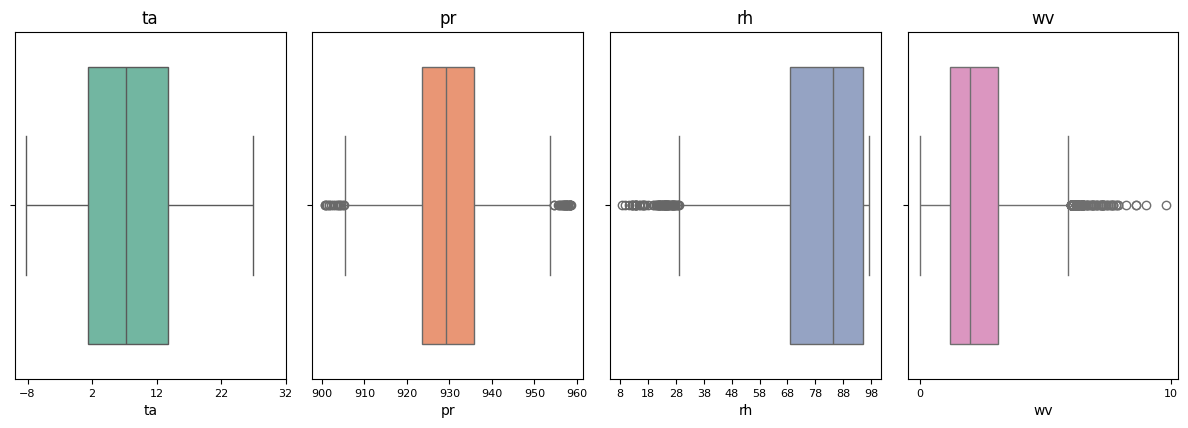

In [157]:
features = ['ta', 'pr', 'rh', 'wv']
print(brenna_meteo.dtypes)

# Ustawienie wykresu
plt.figure(figsize=(12, 8))
palette = sns.color_palette("Set2", len(features)) 

# Tworzymy wykres pudełkowy dla każdej zmiennej
for i, feature in enumerate(features):
    plt.subplot(2, 4, i+1)  # Ustawiamy wykresy w siatce 2x4
    sns.boxplot(data=brenna_meteo, x=feature, palette=[palette[i]])
    plt.title(f'{feature}')
    plt.xlabel(f'{feature}')
    min_val = min(brenna_meteo[feature])
    max_val = max(brenna_meteo[feature])
    ticks = range(int(min_val), int(max_val)+10, 10)  # Zakładamy krok co 10
    plt.xticks(ticks, fontsize=8)  # Ustawienie etykiet na osi Y

plt.tight_layout()
plt.show()

In [158]:
brenna_meteo = brenna_meteo.groupby(brenna_meteo.index.date).agg({
    'ta': 'mean',
    'rh': 'mean',
    'pr': ['min', 'max', 'mean'],  # min i max ciśnienie + mean dla innych modeli
    'wv': 'mean',
    'wpmx': 'max',
    'wd': 'mean',
    'rf': 'max'
})

# Po agregacji mamy MultiIndex w kolumnach -> trzeba spłaszczyć
brenna_meteo.columns = ['_'.join(col).strip() for col in brenna_meteo.columns.values]
brenna_meteo.index = pd.to_datetime(brenna_meteo.index)

# Dodanie kolumny różnicy ciśnienia
brenna_meteo['pr_delta'] = brenna_meteo['pr_max'] - brenna_meteo['pr_min']


print(brenna_meteo.head())

brenna_meteo.index = pd.to_datetime(brenna_meteo.index)
brenna_meteo['season'] = brenna_meteo.index.month.map({
    1: 1, 2: 1, 3: 2, 4: 2, 5: 2,
    6: 3, 7: 3, 8: 3, 9: 4, 10: 4,
    11: 4, 12: 1
})



# print(brenna_meteo.dtypes)
print(brenna_meteo.head())

             ta_mean    rh_mean  pr_min  pr_max     pr_mean   wv_mean  \
2020-01-01 -1.458333  83.187500   944.6   947.8  946.333333  2.566667   
2020-01-02  5.287500  16.108333   938.0   946.7  942.475000  2.004167   
2020-01-03  0.754167  59.945833   934.4   940.2  937.404167  4.220833   
2020-01-04 -0.333333  92.212500   931.6   935.8  933.475000  3.704167   
2020-01-05 -4.112500  94.554167   934.5   948.5  943.058333  3.454167   

            wpmx_max     wd_mean  rf_max  pr_delta  
2020-01-01       8.3  258.875000       1       3.2  
2020-01-02      10.4  187.291667       1       8.7  
2020-01-03      12.2  174.250000       1       5.8  
2020-01-04      13.7  271.750000       1       4.2  
2020-01-05      13.5  331.333333       1      14.0  
             ta_mean    rh_mean  pr_min  pr_max     pr_mean   wv_mean  \
2020-01-01 -1.458333  83.187500   944.6   947.8  946.333333  2.566667   
2020-01-02  5.287500  16.108333   938.0   946.7  942.475000  2.004167   
2020-01-03  0.754167  59

In [89]:
brenna_meteo['delta_pr'] = brenna_meteo['pr'].diff()

brenna_meteo['wv'] = brenna_meteo['wv'].astype(int)
brenna_meteo['wd'] = np.cos(brenna_meteo['wd'] * np.pi / 180)

y = brenna_meteo['rf']
X = brenna_meteo[['rh', 'pr', 'season', 'wd']]
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=59)

model = sk.tree.DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# sk.tree.plot_tree(model)

           ta_mean   rh_mean    pr_min    pr_max   pr_mean   wv_mean  \
ta_mean   1.000000 -0.237095 -0.393638 -0.453505 -0.430906 -0.312496   
rh_mean  -0.237095  1.000000 -0.043287 -0.147893 -0.089287  0.001272   
pr_min   -0.393638 -0.043287  1.000000  0.930322  0.981340 -0.172371   
pr_max   -0.453505 -0.147893  0.930322  1.000000  0.977439 -0.098627   
pr_mean  -0.430906 -0.089287  0.981340  0.977439  1.000000 -0.143362   
wv_mean  -0.312496  0.001272 -0.172371 -0.098627 -0.143362  1.000000   
wpmx_max -0.222319 -0.007314 -0.239884 -0.150002 -0.197950  0.857592   
wd_mean  -0.166483  0.228275 -0.047826 -0.060671 -0.055556  0.152011   
rf_max   -0.038763  0.498354 -0.229334 -0.246045 -0.240546 -0.008108   
pr_delta -0.107778 -0.266605 -0.302550  0.068087 -0.129334  0.212591   
season    0.521044  0.127771 -0.049833 -0.139260 -0.099229 -0.307834   
month     0.219427  0.276463 -0.090560 -0.187675 -0.134735 -0.192356   

          wpmx_max   wd_mean    rf_max  pr_delta    season     

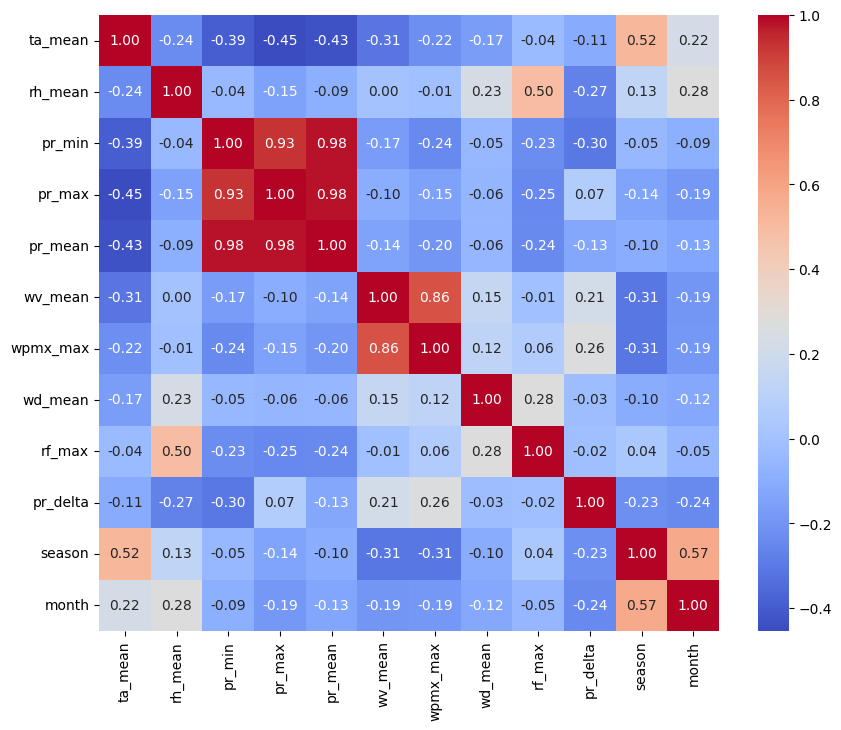

In [95]:
correlation_matrix = brenna_meteo.corr()

# wyświetl korelacje w formie tabeli
print(correlation_matrix)

# (opcjonalnie) narysuj ładną mapę korelacji
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [90]:
# Calculate accuracy
accuracy = sk.metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Get the classification report (precision, recall, f1-score, support)
print("Classification Report:")
print(sk.metrics.classification_report(y_test, y_pred))

# Confusion matrix to see the True Positives, False Positives, etc.
print("Confusion Matrix:")
print(sk.metrics.confusion_matrix(y_test, y_pred))


Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.78        61
           1       0.73      0.67      0.70        48

    accuracy                           0.74       109
   macro avg       0.74      0.73      0.74       109
weighted avg       0.74      0.74      0.74       109

Confusion Matrix:
[[49 12]
 [16 32]]
